<h1 style="font-size: 2rem; 
color: #e7ea43; 
font-weight: 400">
  PHY 397 Assignment
</h1>

##### Name: John Amedzo
##### ID: 4268420

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Question:
</h2>

Write a Python code to numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well. The potential energy function is given by:

##### V(x) = { 0 , for 0 <= x <= a
#####         V_0 , for a < x < b
#####         infinity , for x < 0 or x > b
##### }

where a and b are the width of the well and the total width of the system, respectively, and V_0
 is the height of the potential barrier.

Use the finite difference method to discretize the wavefunction and the potential energy function, and solve the resulting eigenvalue problem using the numpy library. Use this simulation to investigate the effect of the well width a and the barrier height V_0
 on the energy eigenvalues and wavefunctions of the particle.

Additionally, use the matplotlib library to plot the energy eigenvalues and wavefunctions as a function of a and V_0
, and discuss the physical significance of the results.

<h1 style="font-size: 2rem; 
color: #e7ea43; 
font-weight: 400">
  Background
</h1>

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Computational Physics:
</h2>

  - Computational physics is a discipline that makes use of physics and applied mathematics in combination with computer science methodologies to come up with solutions to various complex problems.

 - From time to time, scientists and mathematicians break down theories, finding solutions to them.
 However, it is often the case that certain problems come up that are so complex, solving them for meaningful predictions become impossible. This is where computational physics comes in.

 - With the help of computational physics, a problem such as; <p style="color: #e7ea43">the time-independent schrodinger equation </p>can be solved for a quantum particle in a potential well and represented graphically.

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Objectives:
</h2>

- In this project, the goal is;
<ol>
  <li>
    to gain an understanding of how to make use  of computational methods to solve physical  and mathematical problems. In this case, 

   <p style="color: #e7ea43">
     the time-independent schrodinger equation 
   </p>
  </li>

  <li>
    to make use of simulations and graphical  representations to visualize problems as well  as their solutions.
  </li>

  <li>
    to understand the behaviour of the particle in the potential well.
  </li>

  <li> 
    to also find out how the potential well changes in relation to the particle and its energy.
  </li>
</ol>

<h1 style="font-size: 2rem; 
color: #e7ea43; 
font-weight: 400">
  Methods and Results
</h1>

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Solutions:
</h2>

In [99]:
# All imports

import numpy as np
import matplotlib.pyplot as plt

In [100]:
class One_D_Potential_Well:     # A class set to handle all functions for the particle inside the potential well.
     
    def __init__(self, a, b, V_0, n):    # Initial function.
        self.a = a
        self.b = b
        self.V_0 = V_0
        self.n = n        # Number of eigenvalues.
        self.x, self.dx = np.linspace(0, b, n, retstep=True)
        self.V = np.zeros_like(self.x)
        self.V[(self.x > a) & (self.x < b)] = V_0

    def Eigen_Calculator(self): # Function to handle the eigenvalue problem for the wavefunction.
        d2dx2 = np.diag(-2*np.ones(self.n)) + np.diag(np.ones(self.n-1), 1) + np.diag(np.ones(self.n-1), -1)
        d2dx2 /= self.dx**2
        d2dx2[0, 0] = 0
        d2dx2[-1, -1] = 0
        H = -0.5*d2dx2 + np.diag(self.V)
        self.E, self.psi = np.linalg.eigh(H)

    def Potential_Energy(self): # Function for the potential energy to be plotted.
        plt.plot(np.arange(len(self.E)), self.E, 'o-')
        plt.xlabel('Energy Level')
        plt.ylabel('Energy')

    def Wavefunction(self, i): # Function for the wavefunction to be plotted.
       plt.plot(self.x, self.psi[:, i], label=f'E={self.E[i]:.2f}')
       plt.xlabel('x')
       plt.ylabel('Psi')
       plt.legend()


In [101]:
# Here, an instance of the One_D_Potential_Well class is created.

Potential_well = One_D_Potential_Well(1, 5, 100, 1000)


Potential_well.Eigen_Calculator()   # To deduce the eigenvalues and eigenvectors.



<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Relationship Between Energy Eigenvalues, a and V_0
</h2>

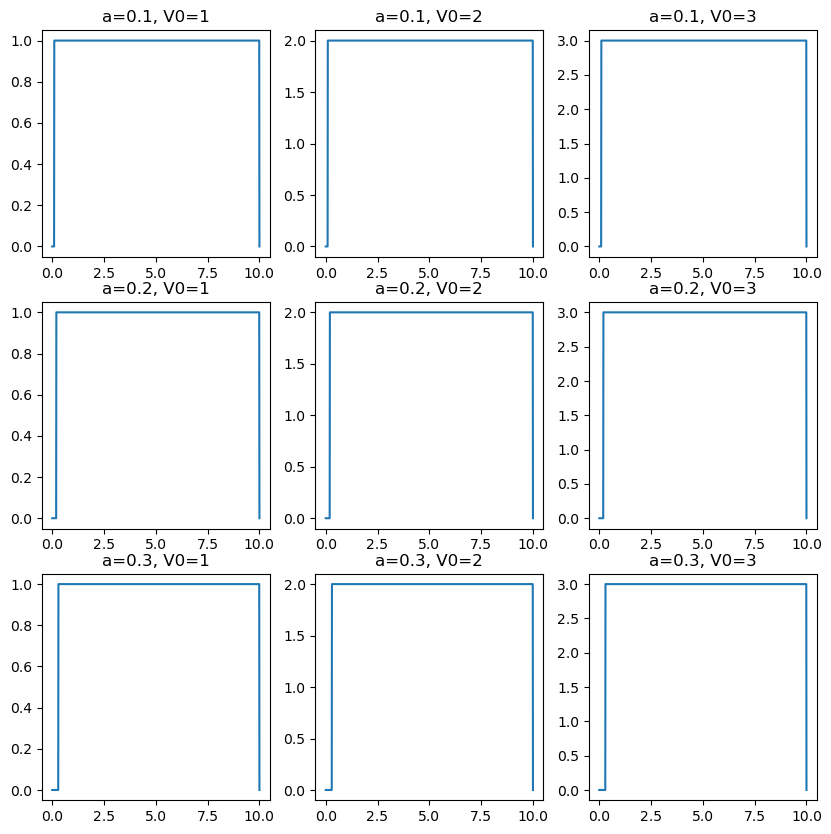

In [102]:
if __name__ == '__main__':
    a_values = [0.1, 0.2, 0.3] # Well width varied from 0.1 - 0.3.
    V_0_values = [1, 2, 3]      # Well height varied from 1 - 3.
    fig, axs = plt.subplots(len(a_values), len(V_0_values), figsize=(10, 10))
    for i, a in enumerate(a_values):
        for j, V_0 in enumerate(V_0_values):
            system = One_D_Potential_Well(a=a, b=10, V_0=V_0, n=1000)
            system.Eigen_Calculator()
            axs[i, j].plot(system.x, system.V)
            axs[i, j].set_title(f'a={a}, V0={V_0}')
    plt.show()


<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Potential Energy Plot
</h2>

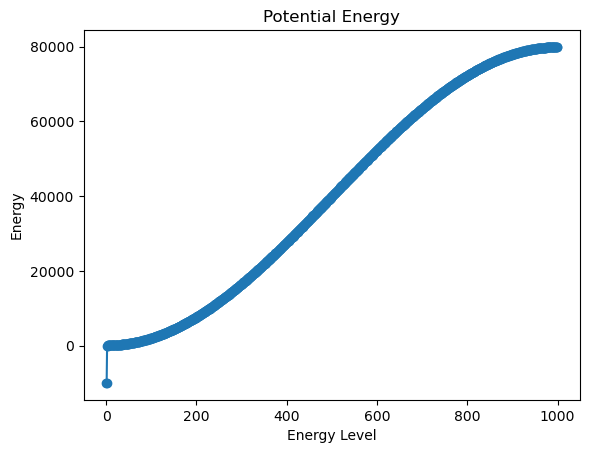

In [103]:
Potential_well.Potential_Energy()    # This shows the potential energy function graphically.   
plt.title('Potential Energy')
plt.show()

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  First Energy Level Wave Function
</h2>

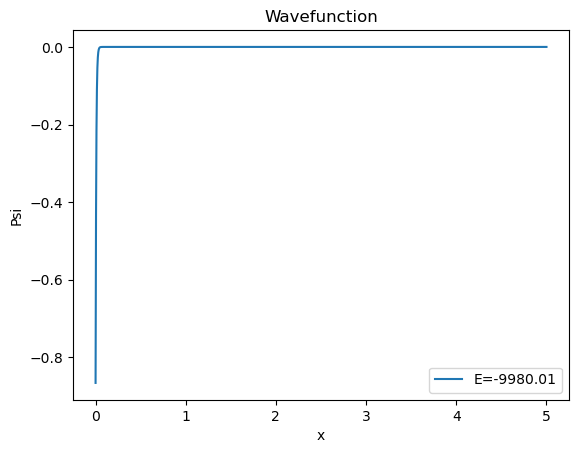

In [104]:
Potential_well.Wavefunction(0)    # This shows the wavefunction for the first energy level graphically.
plt.title('Wavefunction')
plt.show()

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Energy Visualization for V_0 Against a
</h2>

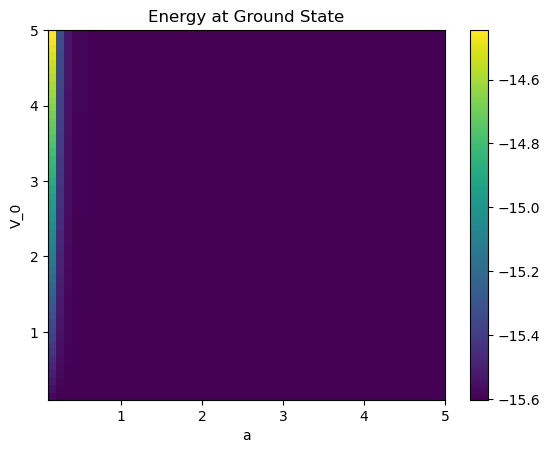

In [105]:
if __name__ == '__main__':
    a_values = np.linspace(0.1, 5, 50)
    V_0_values = np.linspace(0.1, 5, 50)
    E = np.zeros((len(a_values), len(V_0_values)))
    for i, a in enumerate(a_values):
        for j, V_0 in enumerate(V_0_values):
            system = One_D_Potential_Well(a=a, b=10, V_0=V_0, n=80)
            system.Eigen_Calculator()
            E[i, j] = system.E[0]
    plt.imshow(E.T, extent=[a_values[0], a_values[-1], V_0_values[0], V_0_values[-1]], origin='lower', aspect='auto')
    plt.colorbar()
    plt.xlabel('a')
    plt.ylabel('V_0')
    plt.title('Energy at Ground State')
    plt.show()

<h1 style="font-size: 2rem; 
color: #e7ea43; 
font-weight: 400">
  Conclusion
</h1>

- In this study, the particle in the potential well was analysed using the time-independent Schrödinger equation. 

- A further analysis was made where the eigenvalues and eigenvectors for the corresponding wavefunction and potential energy were numerically calculated.

- Graphical representations were generated at each stage showing first, the relationship between the potential well width (a) and the barrier height (V_0) for different range of values.

- Secondly, a graph of the amount of energy was plotted against the particle's potential energy level in the well.

- Thirdly, a wavefuntion graph was plotted showing the first energy level of the particle in the potential well.

- Lastly, a color graph shows the frequency/amount of energy(ies) for the particle.

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Significance of The Study:
</h2>

- This study is quite imperative since has many applications in fields of solid state physics, nanotechnology, quantum computing, material science, etc.

- By investigating the effect of the well width (a) and the barrier height (V_0) on the energy eigenvalues and wavefunctions of the particle, a better understanding of how these parameters affect the behavior of the system can be achieved. 

- This knowledge can then be applied to design and optimize systems with specific quantum mechanical properties.

- This means new technologies and human advancements.

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Journey:
</h2>

- In the course of this study, I had the opportunity to spend time researching on topics relating to the given task.

- I got to discover new knowledge(-new to me :D) about python and most importantly, computational physics.

- I made use of very helpful online and offline resources, and needless to say, Jupyter Notebook. 

<h2 style="font-size: 2rem; 
color: #1dd62086; 
font-weight: 300">
  Challenges:
</h2>

- Just like many other tasks, this one had some challenges of its own. Here's a list of a few roadblocks I had to overcome during this study;

<ol>
  <li>
    Converting the task given into computational form posed a bit of a problem at the start.
  </li>

  <li>
    Also, understanding the computational results proved daunting. But the graphical representations helped clarify that.
  </li>
</ol>

<h1 style="font-size: 2rem; 
color: #e7ea43; 
font-weight: 400">
  Recommendations
</h1>

- More practical excercises such as this one assigned to us intermittently would go a long way to solidify our understanding and our familiarity with the python programming language and the computational physics aspect.